In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri Okuma

In [2]:
dataFrame = pd.read_csv('odev.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


Veriyi Anlamak

In [3]:
dataFrame.describe() ## Verinin istatistikleri

,temperature,humidity
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [4]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

Encode - outlook

In [5]:
outlook = dataFrame.iloc[:,0:1].values
outlook

array([['sunny'],
       ['sunny'],
       ['overcast'],
       ['rainy'],
       ['rainy'],
       ['rainy'],
       ['overcast'],
       ['sunny'],
       ['sunny'],
       ['rainy'],
       ['sunny'],
       ['overcast'],
       ['overcast'],
       ['rainy']], dtype=object)

In [6]:
from sklearn import preprocessing

In [7]:
labelEncoder = preprocessing.LabelEncoder()
outlook[:,0] = labelEncoder.fit_transform(dataFrame.iloc[:,0])
outlook

array([[2],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1]], dtype=object)

In [8]:
oneHotEncoder = preprocessing.OneHotEncoder()
outlook = oneHotEncoder.fit_transform(outlook).toarray()
outlook

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

Encode - windy

In [9]:
windy = dataFrame.iloc[:,3:4].values
windy

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True]])

In [10]:
labelEncoder = preprocessing.LabelEncoder()
windy[:,0] = labelEncoder.fit_transform(dataFrame.iloc[:,3])
windy

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True]])

In [11]:
oneHotEncoder = preprocessing.OneHotEncoder()
windy = oneHotEncoder.fit_transform(windy).toarray()
windy

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

Encode - play

In [12]:
play = dataFrame.iloc[:,4:5].values
play

array([['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no']], dtype=object)

In [13]:
labelEncoder = preprocessing.LabelEncoder()
play[:,0] = labelEncoder.fit_transform(dataFrame.iloc[:,4])
play

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=object)

In [14]:
oneHotEncoder = preprocessing.OneHotEncoder()
play = oneHotEncoder.fit_transform(play).toarray()
play

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

unified - outlook

In [15]:
unifiedDataFrame1 = pd.DataFrame(data=outlook,index=range(len(outlook)),columns = ['overcast','rainy','sunny'])
unifiedDataFrame1

,overcast,rainy,sunny
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


unified - windy

In [16]:
unifiedDataFrame2 = pd.DataFrame(data=windy[:,1],index=range(len(windy)),columns = ['windy'])
unifiedDataFrame2

,windy
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,0.0
9,0.0


unified - play

In [17]:
unifiedDataFrame3 = pd.DataFrame(data=play[:,1],index=range(len(play)),columns = ['play'])
unifiedDataFrame3

,play
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
5,0.0
6,1.0
7,0.0
8,1.0
9,1.0


concat

In [18]:
dataFrame = dataFrame.iloc[:,1:3]

In [19]:
dataFrame = pd.concat([dataFrame,unifiedDataFrame1],axis=1)
dataFrame = pd.concat([dataFrame,unifiedDataFrame2],axis=1)
dataFrame = pd.concat([dataFrame,unifiedDataFrame3],axis=1)
dataFrame

,temperature,humidity,overcast,rainy,sunny,windy,play
0,85,85,0.0,0.0,1.0,0.0,0.0
1,80,90,0.0,0.0,1.0,1.0,0.0
2,83,86,1.0,0.0,0.0,0.0,1.0
3,70,96,0.0,1.0,0.0,0.0,1.0
4,68,80,0.0,1.0,0.0,0.0,1.0
5,65,70,0.0,1.0,0.0,1.0,0.0
6,64,65,1.0,0.0,0.0,1.0,1.0
7,72,95,0.0,0.0,1.0,0.0,0.0
8,69,70,0.0,0.0,1.0,0.0,1.0
9,75,80,0.0,1.0,0.0,0.0,1.0


Model Oluşturma

In [38]:
y = dataFrame['humidity'].values ## Bağımlı veri
x = dataFrame.drop('humidity',axis=1).values ## Bağımsız veriler

In [39]:
from sklearn.model_selection import train_test_split ## Verileri istediğimiz oranda bölmek için

In [40]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0) ## test ve train oranı 0.3 

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler() ## verileri scale etme aynı uzaya indirme denebilir

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linearRegression = LinearRegression() ## LinearRegression ile öğrenme
linearRegression.fit(x_train,y_train)

LinearRegression()

In [45]:
guess = linearRegression.predict(x_test) ## x_teste göre tahmin
guess ## Tahmin verisi

array([84.45365573, 63.93839954, 85.76050662, 64.21013241, 75.06793322])

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(y_test,guess) ## ortalama 6.35 sapma var.

11.599539435808865

In [48]:
x_train = pd.DataFrame(x_train).sort_index()
y_train = pd.DataFrame(y_train).sort_index()

In [49]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,guess)

-1.3108047443640714

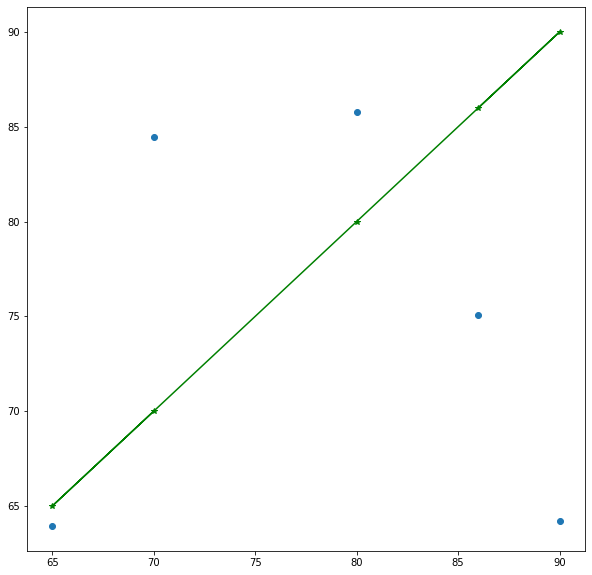

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,guess)
plt.plot(y_test,y_test,'g-*')

Backward Elimination ## Sistem iyileşti

In [32]:
import statsmodels.api as sm

In [33]:
X = np.append(arr = np.ones((len(play),1)).astype(int),values=dataFrame.iloc[:,1:2],axis=1)
dataFrame

,temperature,humidity,overcast,rainy,sunny,windy,play
0,85,85,0.0,0.0,1.0,0.0,0.0
1,80,90,0.0,0.0,1.0,1.0,0.0
2,83,86,1.0,0.0,0.0,0.0,1.0
3,70,96,0.0,1.0,0.0,0.0,1.0
4,68,80,0.0,1.0,0.0,0.0,1.0
5,65,70,0.0,1.0,0.0,1.0,0.0
6,64,65,1.0,0.0,0.0,1.0,1.0
7,72,95,0.0,0.0,1.0,0.0,0.0
8,69,70,0.0,0.0,1.0,0.0,1.0
9,75,80,0.0,1.0,0.0,0.0,1.0


In [34]:
X_1 = dataFrame.drop('humidity',axis=1).values
X_1 = np.array(X_1,dtype=float)
model = sm.OLS(dataFrame['humidity'],X_1).fit()
print(model.summary()) ## Windy 0.59 cıktı atıcaz!

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6653
Date:                Mon, 25 Jan 2021   Prob (F-statistic):              0.661
Time:                        18:38:13   Log-Likelihood:                -49.542
No. Observations:                  14   AIC:                             111.1
Df Residuals:                       8   BIC:                             114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4920      0.597      0.825      0.4

In [35]:
dataFrame = dataFrame.drop('windy',axis=1)

In [36]:
X_1 = dataFrame.drop('humidity',axis=1).values
X_1 = np.array(X_1,dtype=float)
model = sm.OLS(dataFrame['humidity'],X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               humidity   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8165
Date:                Mon, 25 Jan 2021   Prob (F-statistic):              0.546
Time:                        18:38:14   Log-Likelihood:                -49.809
No. Observations:                  14   AIC:                             109.6
Df Residuals:                       9   BIC:                             112.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6484      0.506      1.282      0.2

In [37]:
y = dataFrame['humidity'].values ## Bağımlı veri
x = dataFrame.drop('humidity',axis=1).values ## Bağımsız veriler

In [38]:
from sklearn.model_selection import train_test_split ## Verileri istediğimiz oranda bölmek için

In [39]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0) ## test ve train oranı 0.3 

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler() ## verileri scale etme aynı uzaya indirme denebilir

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linearRegression = LinearRegression() ## LinearRegression ile öğrenme
linearRegression.fit(x_train,y_train)

LinearRegression()

In [44]:
guess = linearRegression.predict(x_test) ## x_teste göre tahmin
guess ## Tahmin verisi

array([77.98135142, 68.29304916, 81.05037539, 71.44926132, 75.78905304])

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(y_test,guess) ## ortalama 2980 sapma var.

8.217292322596276

In [47]:
x_train = pd.DataFrame(x_train).sort_index()
y_train = pd.DataFrame(y_train).sort_index()

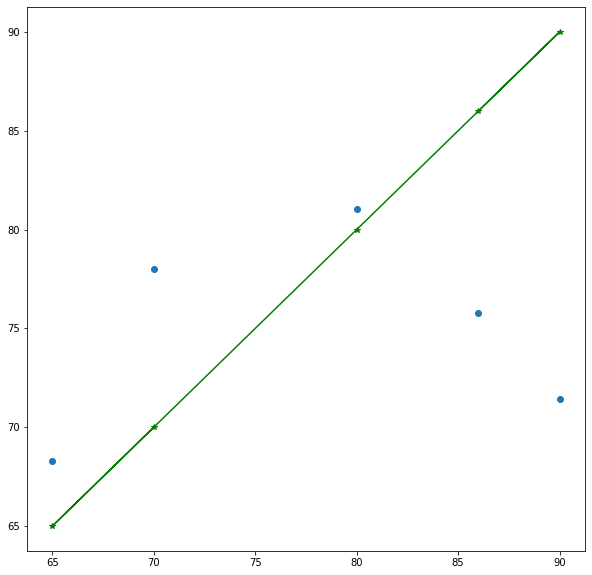

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,guess)
plt.plot(y_test,y_test,'g-*')